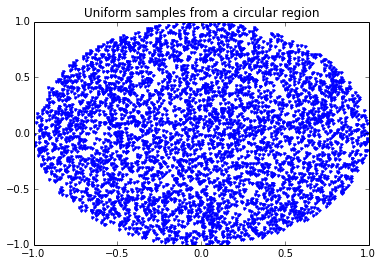

In [85]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

N = 5000

theta = np.random.rand(N)*2*np.pi
r = np.power(np.random.rand(N),0.5)
x = r*np.cos(theta)
y = r*np.sin(theta)

plt.plot(x,y,'.')
plt.title('Uniform samples from a circular region')
plt.show()

Efficiency of the proposal: 0.8714


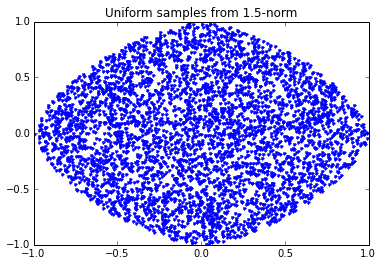

In [88]:
def is_accepted(x, y, p):
    return np.power(np.absolute(x),p)+np.power(np.absolute(y),p) <= 1;

x1 = []
y1 = []
x2 = []
y2 = []

for i in range(N):
    if(is_accepted(x[i],y[i],1.5)):
        x1.append(x[i])
        y1.append(y[i])
        
    if(is_accepted(x[i],y[i],0.7)):
        x2.append(x[i])
        y2.append(y[i])

print('Efficiency of the proposal:',len(x1)/N)
plt.plot(x1,y1,'.')
plt.title('Uniform samples from 1.5-norm')
plt.show()

Efficiency of the proposal: 0.4006


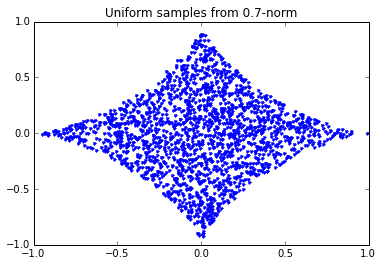

In [89]:
print('Efficiency of the proposal:',len(x2)/N)
plt.plot(x2,y2,'.')
plt.title('Uniform samples from 0.7-norm')
plt.show()

Efficiency of the proposal: 0.45990293505893226


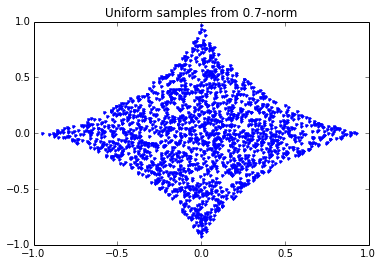

In [84]:
x2 = []
y2 = []

for i in range(len(x1)):
    if(is_accepted(x1[i],y1[i],0.7)):
        x2.append(x1[i])
        y2.append(y1[i])

print('Efficiency of the proposal:',len(x2)/len(x1))
plt.plot(x2,y2,'.')
plt.title('Uniform samples from 0.7-norm')
plt.show()

In [ ]:
theta = np.random.rand(N)*2*np.pi
r = np.power(np.random.rand(N),0.5)
x = r*np.cos(theta)
y = r*np.sin(theta)

In [112]:
def volume_nball(r, n):
    factor = 1
    start = n % 2
    
    if(start == 1):
        factor *=2
        start = 3
    else:
        start = 2
        
    for i in range(start, n+2, 2):
        factor *= ((2*np.pi)/i)
        
    return factor * np.power(r, n)

def volume_hypercube(r, n):
    return np.power(r, n)

r = 2

for n in range(1,10):
    print('Acceptance rate at n =',n,':',volume_nball(r,n)/volume_hypercube(2*r,n))
    

Acceptance rate at n = 1 : 1.0
Acceptance rate at n = 2 : 0.785398163397
Acceptance rate at n = 3 : 0.523598775598
Acceptance rate at n = 4 : 0.308425137534
Acceptance rate at n = 5 : 0.164493406685
Acceptance rate at n = 6 : 0.0807455121883
Acceptance rate at n = 7 : 0.0369122341432
Acceptance rate at n = 8 : 0.0158543442438
Acceptance rate at n = 9 : 0.00644240020066
